# Проект по обработке и визуализации данных

## Обзор

Вы планируете посмотреть какой-то фильм. Можете ли Вы доверять онлайн-рейтингам и отзывам о фильмах? *Особенно* если та компания, которая занимается рейтингами и отзывами, *также* зарабатывает на продаже билетов на фильмы. Есть ли у таких компаний тенденция выдавать завышенные или заниженные рейтинги?

### Цель проекта:

**Цель проекта - выполнить шаги по мотивам статьи на сайте fivethirtyeight.com о рейтингах и посмотреть, предоставляла ли компания Fandango завышенные рейтинги в 2015 году для того, чтобы продавать больше билетов.**

---
----

## Часть 1: Исследование данных


**Статья, по мотивам которой строится проект: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

### Данные

Исходные данные для статьи [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) находятся в свободном доступе по следующей ссылке на github: https://github.com/fivethirtyeight/data. Это два csv-файла. В одном файле данные о рейтингах от компании Fandango, а в другом файле агрегированные данные о рейтингах от других компаний, таких как Metacritic, IMDB и Rotten Tomatoes.

#### all_sites_scores.csv

-----

Файл `all_sites_scores.csv` содержит все фильмы, для которых есть рейтинг Rotten Tomatoes, рейтинг RT User, оценка Metacritic, оценка Metacritic User и оценка IMDb, а также как минимум 30 отзывов от фанатов на Fandango. Данные Fandango были выгружены 24 августа 2015.

Колонка | Определение
--- | -----------
FILM | Название фильма
RottenTomatoes | Оценка "Rotten Tomatoes Tomatometer" для этого фильма
RottenTomatoes_User | Оценка "Rotten Tomatoes user" для этого фильма
Metacritic | Оценка "Metacritic" для этого фильма
Metacritic_User | Оценка "Metacritic user" для этого фильма
IMDB | Оценка "IMDb user" для этого фильма
Metacritic_user_vote_count | Количество голосов за этот фильм от пользователей Metacritic
IMDB_user_vote_count | Количество голосов за этот фильм от пользователей IMDb

----
----

#### fandango_scape.csv

Фильм `fandango_scrape.csv` содержит данные о фильмах, которые авторы статьи выгрузили с Fandango.

Колонка | Определение
--- | ---------
FILM | Название фильма
STARS | Количество звёзд на Fandango.com
RATING |  Рейтинг Fandango - значение, прочитанное с HTML-страницы. Это средний рейтинг фильма.
VOTES | Количество голосов пользователей, которые написали отзыв о фильме (на момент выгрузки данных).

----

**Импорт библиотек**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Часть 2: Сравнение рейтингов Fandango и других пользовательских рейтингов


In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Связь между популярностью фильма и его рейтингом**

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

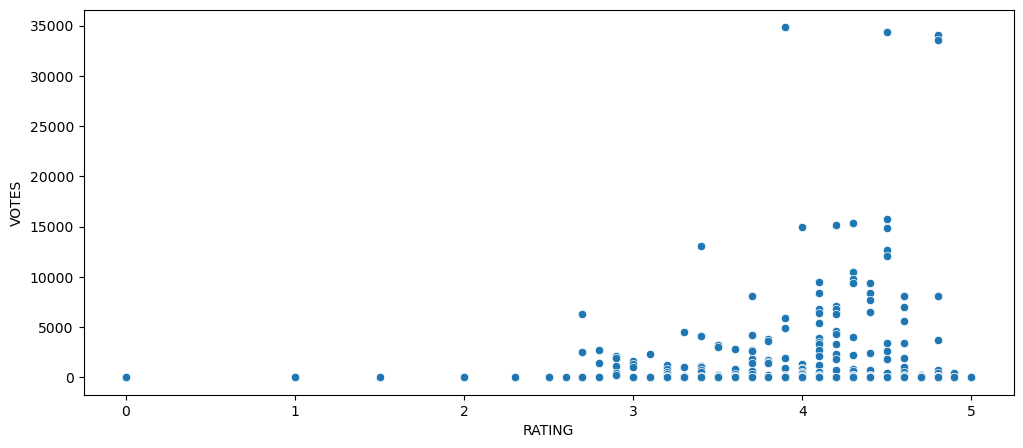

In [7]:
plt.figure(figsize=(12,5))
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES')

**Корреляция между колонками**

In [8]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


 
**Создание нововой колонки, где находятся год выпуска фильма**

In [9]:
fandango['YEAR'] = fandango['FILM'].apply(lambda name: name.split()[-1]).str.replace('\(','').str.replace('\)','')

In [10]:
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

**Разбиение фильмов по годам**

In [11]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2012      1
1964      1
2016      1
Name: YEAR, dtype: int64

**Визуализация количества фильмов в год**

<AxesSubplot:xlabel='YEAR', ylabel='count'>

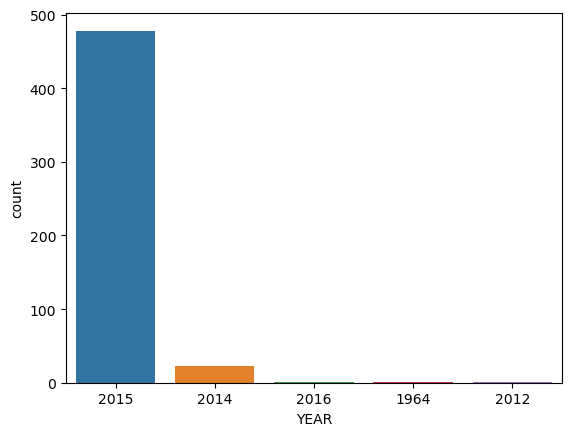

In [12]:
sns.countplot(data = fandango, x = 'YEAR')

**10 фильмов, которые получили наибольшее количество голосов**

In [13]:
fandango.sort_values(['VOTES'], ascending = False).iloc[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Количество фильмов, имеющих нулевое количество голосов**

In [14]:
len(fandango[fandango['VOTES'] == 0])

69

**Таблица только с теми фильмами, которые имеют голоса**

In [16]:
fandango = fandango[fandango['VOTES'] > 0]
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**Из-за особенностей отображения рейтингов в виде звёзд на страницах HTML, истинные рейтинги пользователей могут немного отличаться от рейтингов, которые показываются пользователю**

**График отображает распределение отображаемых рейтингов (STARS) и истинных рейтингов на основе голосов пользователей (RATING)**

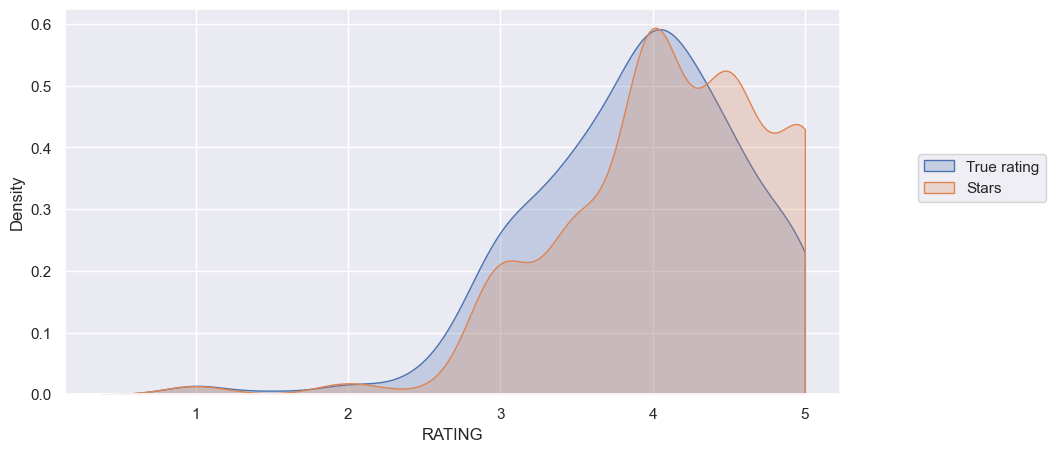

In [17]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(10,5))
sns.kdeplot(data = fandango, x = 'RATING', clip = [0, 5], shade=True, label = 'True rating')
sns.kdeplot(data = fandango, x = 'STARS', clip = [0, 5], shade=True, label = 'Stars')
plt.legend(loc = [1.1, 0.5])

**Разница между колонками STARS и RATING**

In [18]:
fandango['STARS_DIFF'] = fandango['STARS'] - fandango['RATING']
fandango['STARS_DIFF'] = round(fandango['STARS_DIFF'], 2)
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**График, который отображает сколько раз встречается то или иное значение разницы между STAR и RATING**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

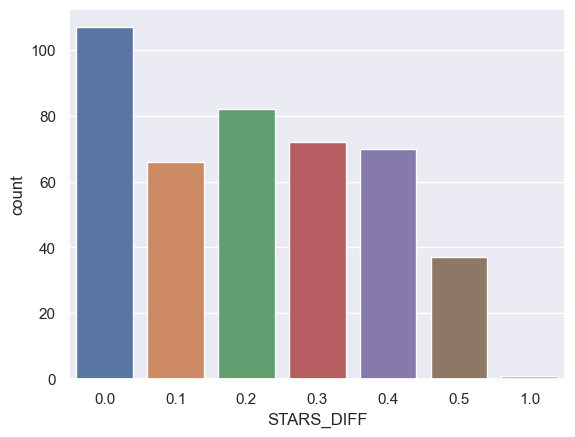

In [19]:
sns.countplot(data = fandango, x = 'STARS_DIFF')

**Фильм, имеющий разницу в 1 звезду между отображаемым рейтингом и истинным рейтингом**

In [20]:
fandango[fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Часть 3: Сравнение рейтингов Fandango с рейтингами других компаний


In [23]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [24]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [25]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [26]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Рейтинги от Rotten Tomatoes

**График, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами**

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

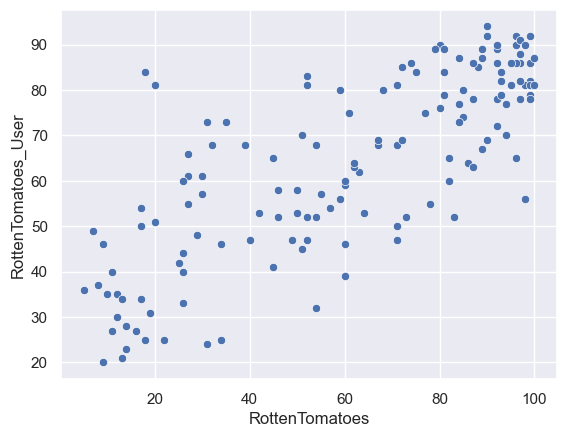

In [27]:
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User')

**Колонка, в которой находится разница между рейтингом от критиков и пользовательским рейтингом для Rotten Tomatoes**

In [28]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


**Средняя абсолютная разницу между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes**

In [29]:
all_sites['Rotten_Diff'].abs().mean()

15.095890410958905

**График распределения разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes**

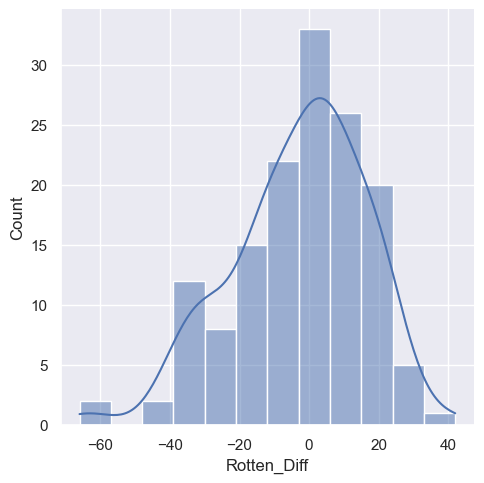

In [30]:
sns.displot(data = all_sites, x = 'Rotten_Diff', kde = True)

**График распределения *абсолютных значений* разницы между рейтингами от критиков и пользовательскими рейтингами для Rotten Tomatoes**

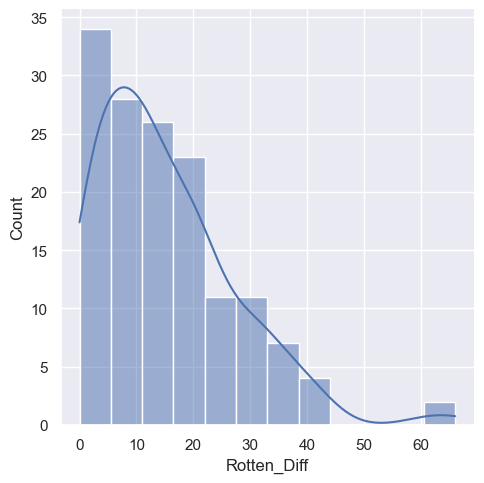

In [31]:
sns.displot(data = all_sites, x = all_sites['Rotten_Diff'].abs(), kde = True)

**5 фильмов, которые в среднем были выше всего оценены пользователями, по сравнению с оценками от критиков:**

In [226]:
all_sites.sort_values('Rotten_Diff').iloc[:5][['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**5 фильмов, которые в среднем были выше всего оценены критиками, по сравнению с оценками от пользователей**

In [32]:
all_sites.sort_values('Rotten_Diff', ascending=False).iloc[:5][['FILM', 'Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## Рейтинги от MetaCritic


**График, который показывает сравнения рейтингов Metacritic и Metacritic User**

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

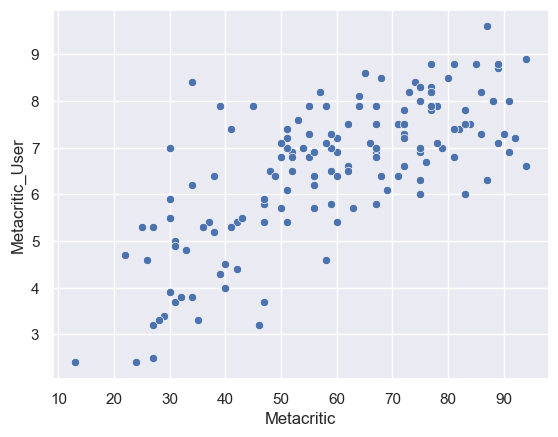

In [33]:
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')

## Рейтинги от IMDB

**График, который показывает связи между количеством голосов на MetaCritic и количеством голосов на IMDB**

<AxesSubplot:xlabel='IMDB_user_vote_count', ylabel='Metacritic_user_vote_count'>

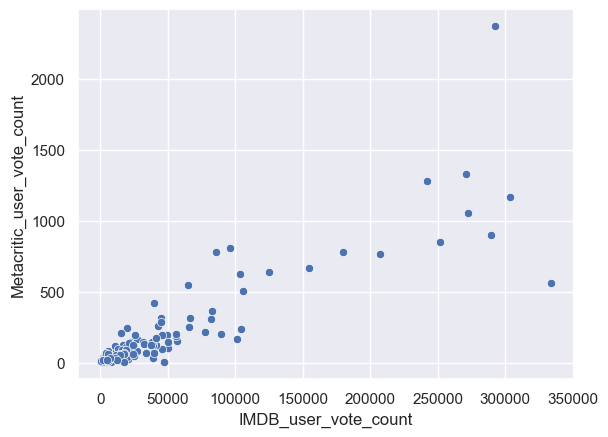

In [34]:
sns.scatterplot(data = all_sites, x = 'IMDB_user_vote_count', y = 'Metacritic_user_vote_count')

**Фильм, получивший наибольшее количество голосов на IMDB**

In [35]:
all_sites[(all_sites['Metacritic_user_vote_count'] > 500) & (all_sites['IMDB_user_vote_count'] > 330000)]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Фильм, получивший наибольшее количество голосов на Metacritic**

In [39]:
all_sites.sort_values('Metacritic_user_vote_count', ascending=False).iloc[0]

FILM                          Mad Max: Fury Road (2015)
RottenTomatoes                                       97
RottenTomatoes_User                                  88
Metacritic                                           89
Metacritic_User                                     8.7
IMDB                                                8.3
Metacritic_user_vote_count                         2375
IMDB_user_vote_count                             292023
Rotten_Diff                                           9
Name: 88, dtype: object

## Сравнение рейтингов Fandango с рейтингами других компаний

Являлись ли рейтинги Fandango искусственно завышенными, чтобы продавать больше билетов?

**Объединение таблицы fandango с таблицей all_sites**

In [40]:
#fandango = fandango.drop('STARS_DIFF', axis=1)
fan_and_all = pd.merge(fandango, all_sites, how = 'inner', on = 'FILM')
fan_and_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [41]:
fan_and_all.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


### Нормализация колонок до диапазона 0-5 в соответствии с колонками STARS и RATINGS от Fandango

**Добавление дополнительных колонкок в all_sites, и запись в них нормализованные значения рейтингов от 0 до 5**

In [42]:
def hundred (rait):
    return round(5*(rait/100), 1)

def dozens (rait):
    return round(5*(rait/10), 1)

fan_and_all['RT_Norm'] = hundred(fan_and_all['RottenTomatoes'])
fan_and_all['RTU_Norm'] = hundred(fan_and_all['RottenTomatoes_User'])
fan_and_all['Meta_Norm'] = hundred(fan_and_all['Metacritic'])
fan_and_all['Meta_U_Norm'] = dozens(fan_and_all['Metacritic_User'])
fan_and_all['IMDB_Norm'] = dozens(fan_and_all['IMDB'])

#fan_and_all['Test'] = 5*(fan_and_all['RottenTomatoes'].apply(lambda num: num/100))

In [43]:
fan_and_all.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.1,2.9,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,4.1,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Создание таблицы, в котором находятся только нормализованные рейтинги и колонки STARS и RATING из исходной таблицы fandango**

In [44]:
norm_scores = pd.DataFrame(data = fan_and_all, columns = ['FILM', 'STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'])

In [45]:
norm_scores.head()

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.1,2.9,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.1,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Сравнение распределений рейтингов от разных компаний


Являются ли сами рейтинги в среднем более высокими, чем у других компаний?


**График, сравнивающий распределения нормализованных рейтингов от всех компаний**

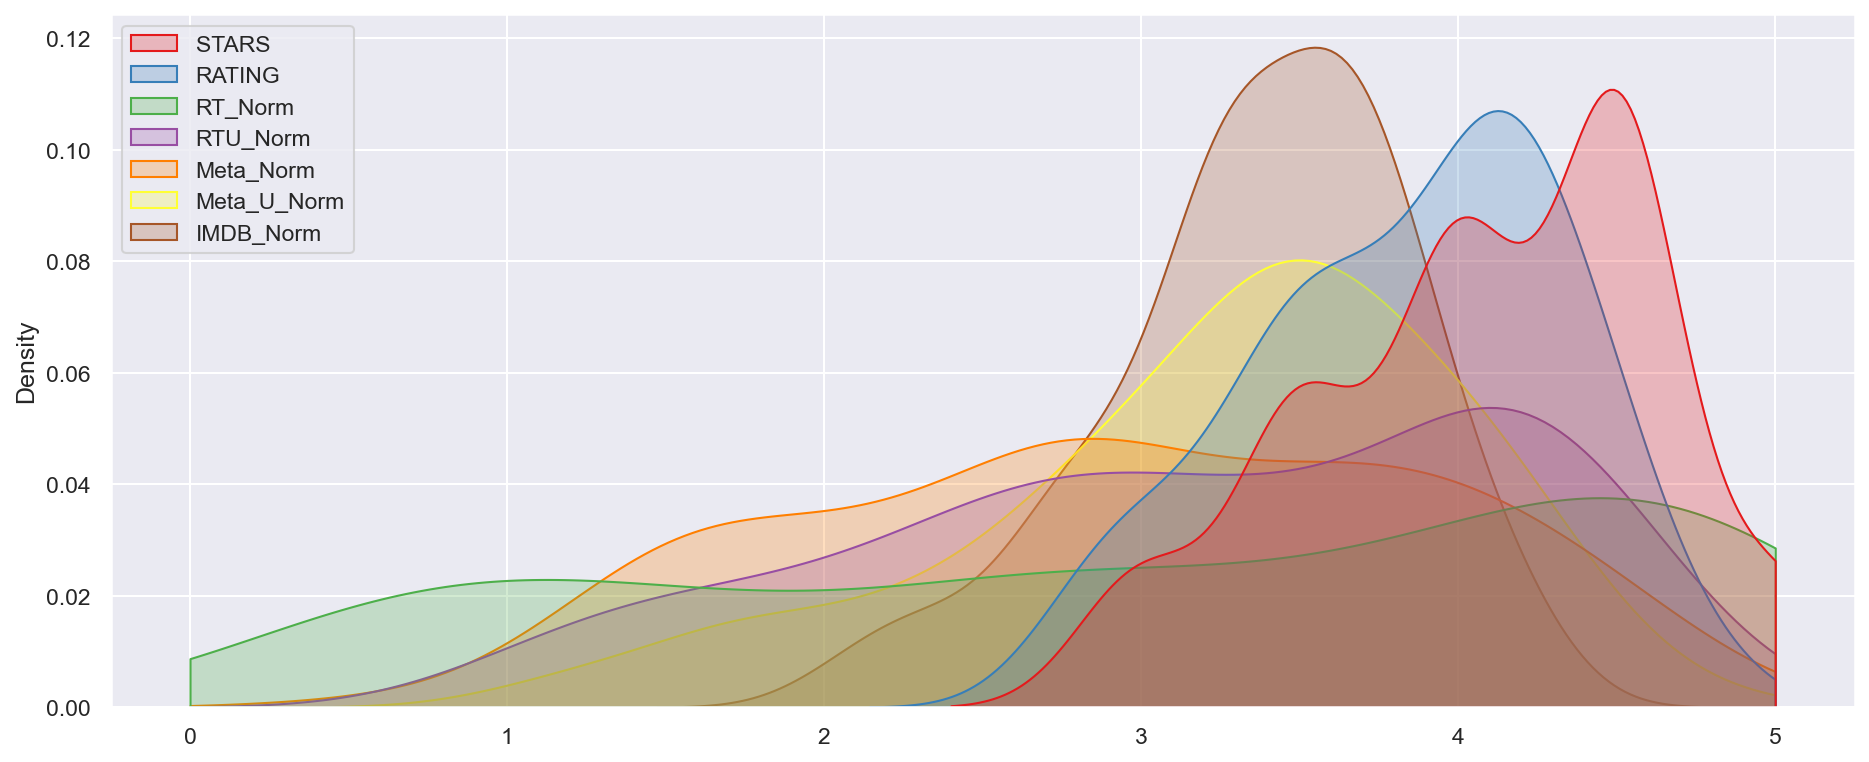

In [46]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**На графике видно, что рейтинги Fandango очень сдвинуты справо** 

**График, сравнивающий распределение рейтингов Rotten Tomatoes от критиков и распределение рейтингов STARS от Fandango**

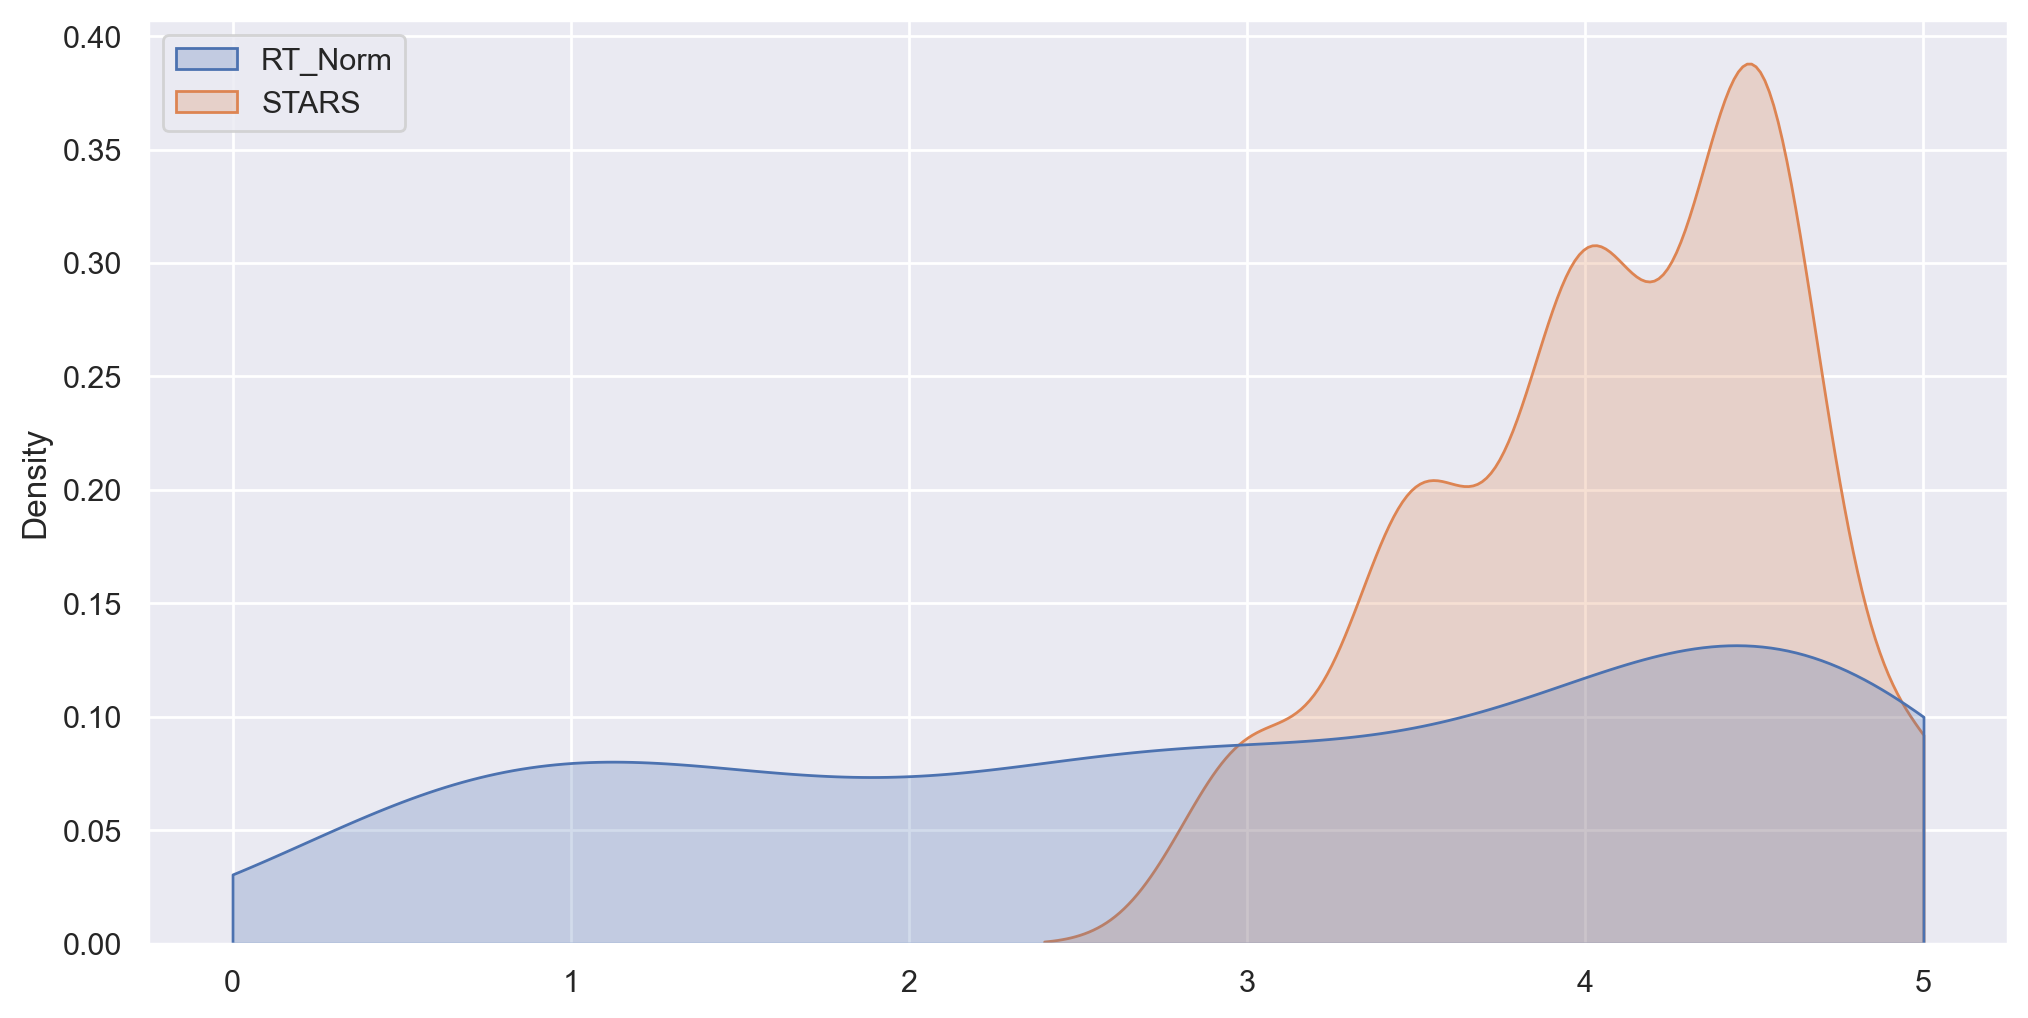

In [56]:
fig, ax = plt.subplots(figsize = (12,6),dpi = 200)
sns.kdeplot(data = norm_scores[['RT_Norm', 'STARS']], shade = True, clip = [0, 5], ax = ax)
move_legend(ax, "upper left")

**График, сравнивающий все нормализованные рейтинги**

<AxesSubplot:ylabel='Count'>

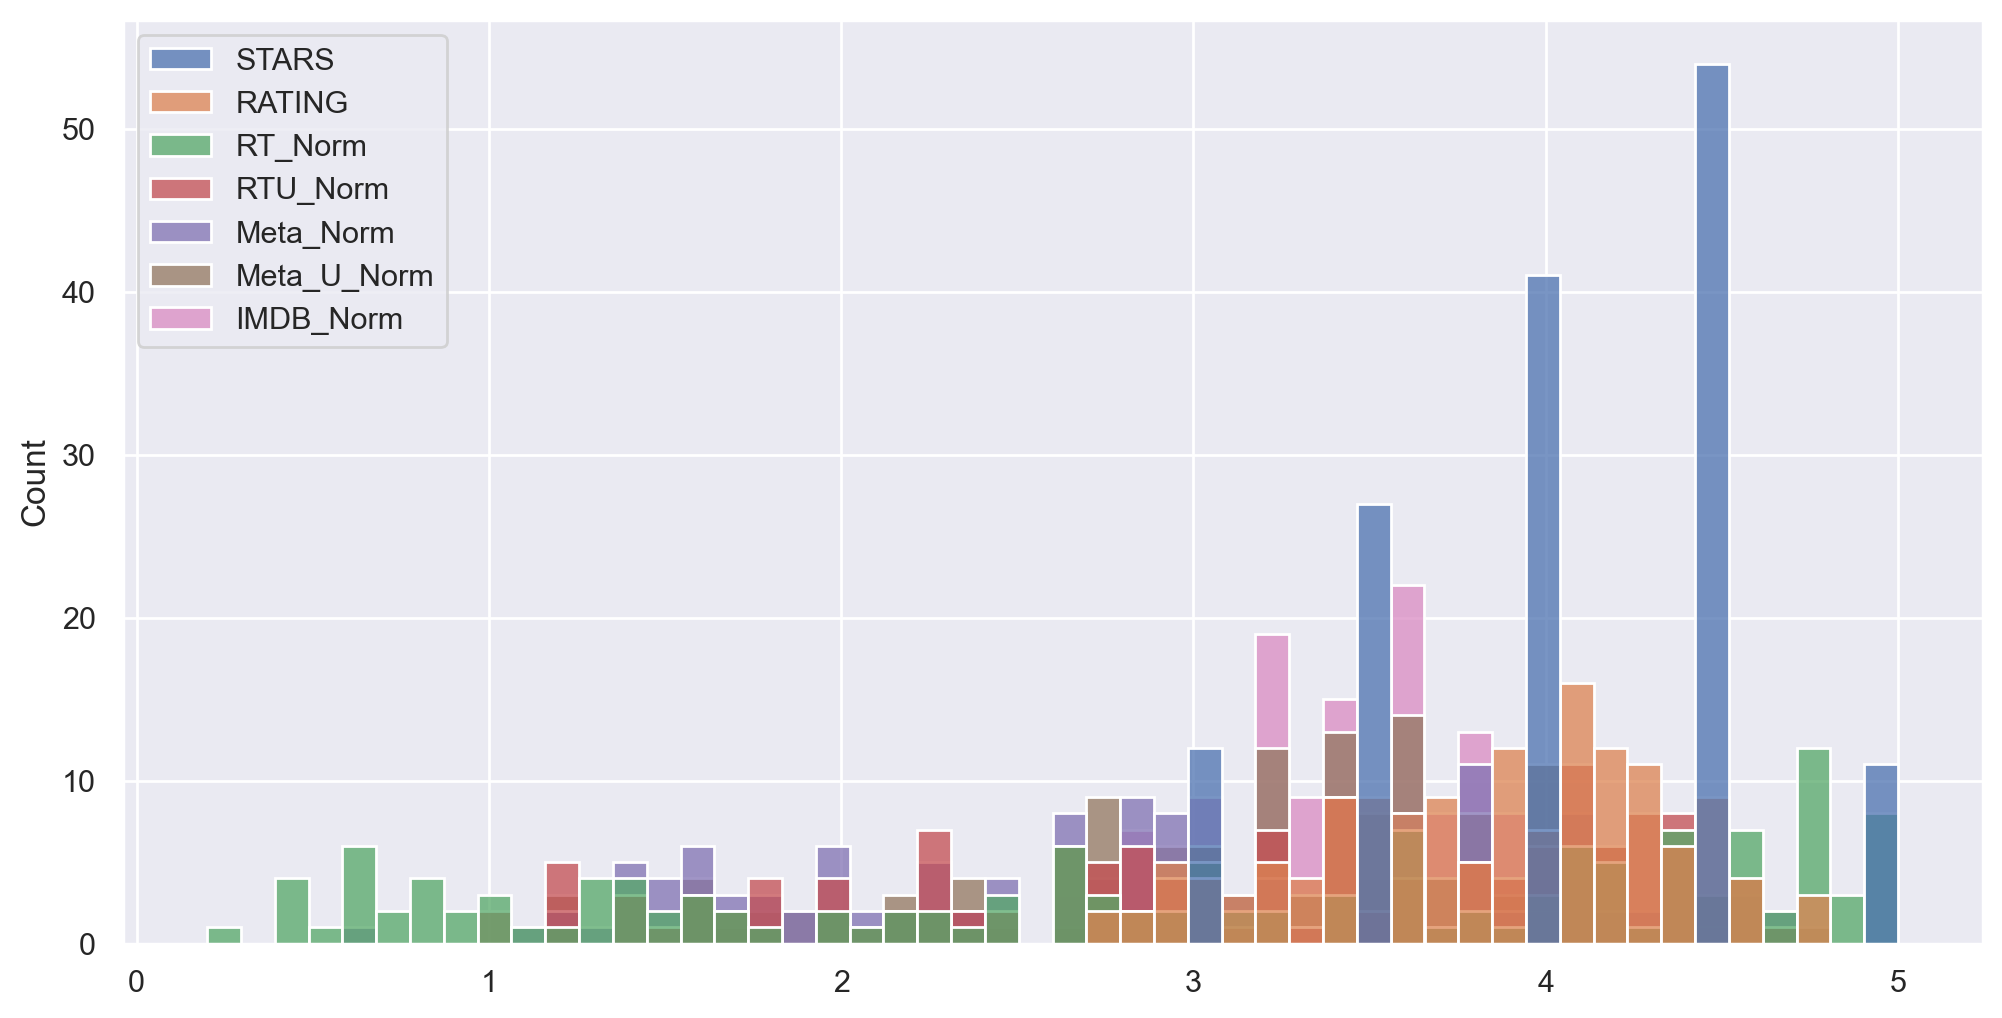

In [57]:
plt.figure(figsize = [12, 6], dpi = 200)
sns.histplot(data = norm_scores, bins = 50)


### Как различные компании оценивают фильмы с наименьшими рейтингами?

**График для всех нормализованных рейтингов**

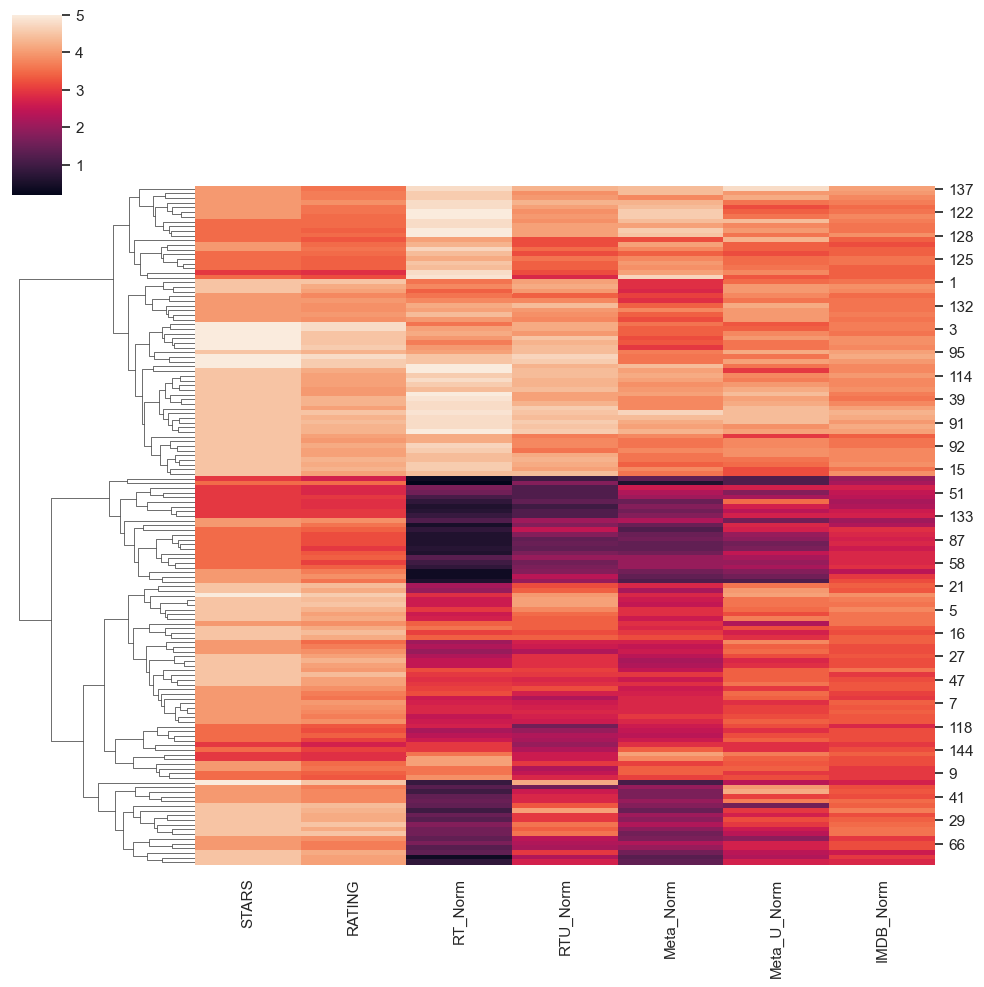

In [58]:
sns.clustermap(data = norm_scores.drop(columns= 'FILM', axis = 1), col_cluster=False)

**Стало очевидно, что рейтинги Fandango явно выше рейтингов других компаний, особенно если смотреть на округлённые вверх значения рейтингов**

**10 фильмов с наихудшими рейтингами по версии Rotten Tomatoes Critic и нормализованные рейтинги к этим фильмам от других компаний**

In [59]:
norm_scores.sort_values(['RT_Norm']).iloc[:10]

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
109,The Vatican Tapes (2015),3.0,2.9,0.6,1.0,1.8,2.7,2.3
88,The Loft (2015),4.0,3.6,0.6,2.0,1.2,1.2,3.2
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8


**График распределения рейтингов от всех компаний для 10 фильмов с наихудшими рейтингами**

<AxesSubplot:ylabel='Density'>

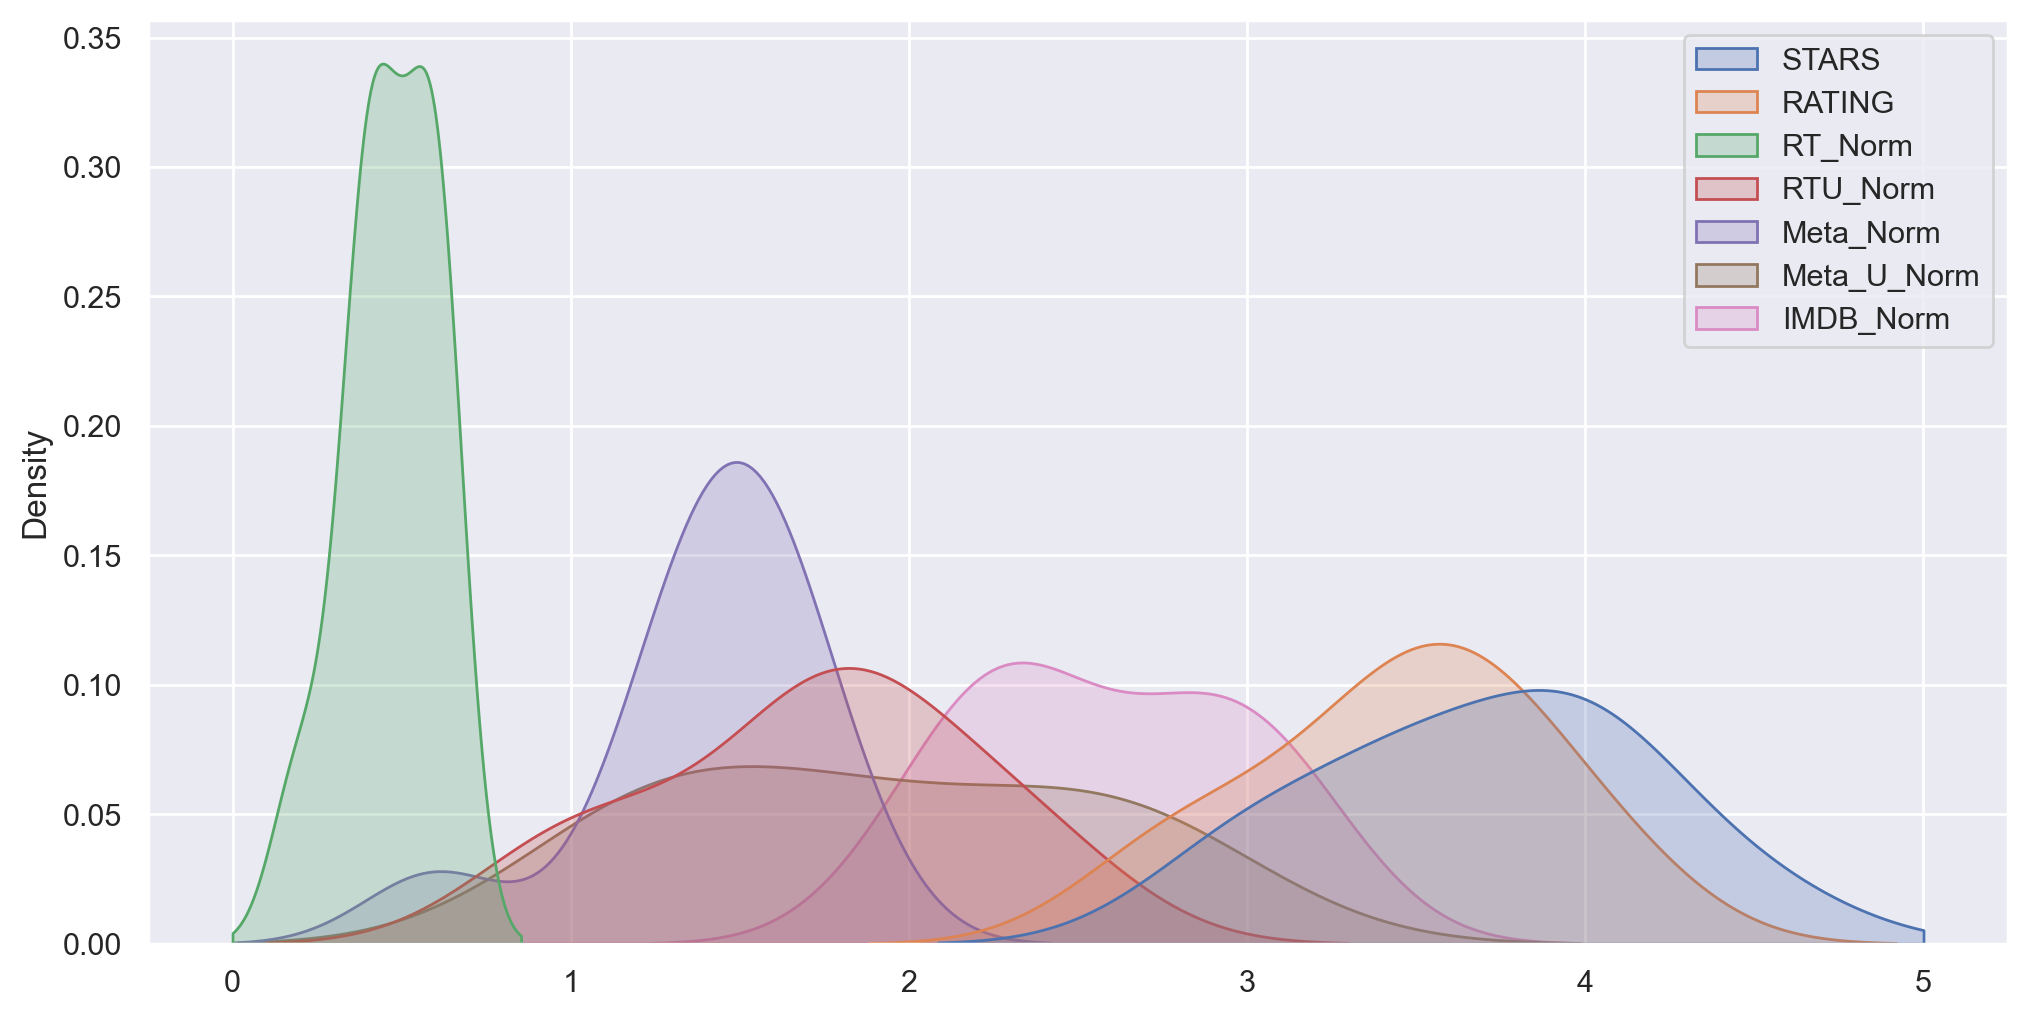

In [60]:
plt.figure(figsize = [12, 6], dpi = 200)
sns.kdeplot(data = norm_scores.sort_values(['RT_Norm']).iloc[:10], shade=True, clip=[0,5])

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Выводы: Fandango показывал 3-4 звезды для фильмов, которые явно были неудачными**  
    
**Больше всего отличается фильм [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango дал ему рейтинг 4.5 звёзд, хотя этот фильм получил [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) от других компаний**

----